
========================================================<br>
<br>
   File name   : YOLOv3_colab_training.ipynb<br>
   Author      : PyLessons<br>
   Created date: 2020-09-30<br>
   Website     : https://pylessons.com/YOLOv3-TF2-GoogleColab<br>
   GitHub      : https://github.com/pythonlessons/TensorFlow-2.x-YOLOv3<br>
   Description : Train custom model on Google colab tutorial<br>
<br>
================================================================


**Open this notebook from google drive**<br>
**Go to "Edit" -> "Notebook settings" and enable GPU.**


In [ ]:
# Check if NVIDIA GPU is enabled
!nvidia-smi

Fri May 28 02:07:12 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    25W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

**Connect and authorize google drive with google colab:**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Open our project "TensorFlow-2.x-YOLOv3" direcotry in google drive:**

In [1]:
%cd /content/drive/MyDrive/ColabNotebooks/cs230robot-tensorflow-REALONE/TensorFlow2xYOLOv3
!ls

/content/drive/MyDrive/ColabNotebooks/cs230robot-tensorflow-REALONE/TensorFlow2xYOLOv3
 checkpoints		    mnist
 Collect_training_data.py   model_data
 custom			    object_tracker.py
 deep_sort		    __pycache__
 detection_custom.py	    README.md
 detection_demo.py	    requirements.txt
 detect_mnist.py	    tools
 evaluate_mAP.py	    train.py
 export			    yolov3
 IMAGES			    YOLOv3_colab_full_inference.ipynb
 LICENSE		    YOLOv3_colab_training.ipynb
 log			   'YOLOv3 training model to tflite.ipynb'
 mAP


**Install all required libraries for our project:**

In [ ]:
!pip install -r ./requirements.txt

     |████████████████████████████████| 320.4MB 24kB/s 
     |████████████████████████████████| 320.4MB 40kB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 3.6MB 37.3MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
     |████████████████████████████████| 460kB 65.4MB/s 
     |████████████████████████████████| 2.9MB 44.6MB/s 
     |████████████████████████████████| 552kB 60.9MB/s 
     |████████████████████████████████| 7.6MB 59.1MB/s 
     |████████████████████████████████| 81kB 10.6MB/s 
  Created wheel for wget: filename=wget-3.2-cp37-none-any.whl size=9681 sha256=7e8abb11dce0f8bd5aa9a4f7a7c8087306609015140cd1c7cb0bcbac1bf882d1
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
ERROR: tensorflow 2.3.1 has requirement numpy<1.19.0,>=1.16.0, but you'll have numpy 1.19.5 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.

**Download yolov3.weights if you don't have it:**

In [ ]:
!wget -P model_data https://pjreddie.com/media/files/yolov3-tiny.weights

--2021-05-28 02:08:22--  https://pjreddie.com/media/files/yolov3-tiny.weights
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35434956 (34M) [application/octet-stream]
Saving to: ‘model_data/yolov3-tiny.weights’

yolov3-tiny.weights 100%[===================>]  33.79M  11.7MB/s    in 2.9s    

2021-05-28 02:08:26 (11.7 MB/s) - ‘model_data/yolov3-tiny.weights’ saved [35434956/35434956]



**Test if TensorFlow works with gpu for you, in output should see similar results:**
```
2.3.0
'/device:GPU:0'
```

In [ ]:
import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

2.5.0


'/device:GPU:0'

**Test by loading trained model:**

In [2]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  
import tensorflow as tf
from yolov3.yolov4 import Create_Yolo
from yolov3.utils import load_yolo_weights, detect_image
from yolov3.configs import *

if YOLO_TYPE == "yolov4":
    Darknet_weights = YOLO_V4_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V4_WEIGHTS
if YOLO_TYPE == "yolov3":
    Darknet_weights = YOLO_V3_TINY_WEIGHTS if TRAIN_YOLO_TINY else YOLO_V3_WEIGHTS

yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE)
# load_yolo_weights(yolo, Darknet_weights) # use Darknet weights
load_yolo_weights(yolo, "model_data/yolov3-tiny.weights") # use Darknet weights

**Test by testing detection on original model:**

In [3]:
image_path   = "./IMAGES/street.jpg"

image = detect_image(yolo, image_path, '', input_size=YOLO_INPUT_SIZE, show=False, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
print(image.shape)

plt.figure(figsize=(30,15))
plt.imshow(image)

Output hidden; open in https://colab.research.google.com to view.

**Run `XML_to_YOLOv3.py` script to convert XML files to YOLOv3 annotations files:**

In [ ]:
# !python tools/XML_to_YOLOv3.py
# !python mnist/make_data.py

**Start training custom model:**

In [ ]:
%load_ext tensorboard

In [ ]:
from train import *
tf.keras.backend.clear_session()
main()

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 2815763993464895006
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 16183459840
locality {
  bus_id: 1
  links {
  }
}
incarnation: 3314661927374784568
physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"
]
RuntimeError in tf.config.experimental.list_physical_devices('GPU')
GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
%reload_ext tensorboard
%tensorboard --logdir logs

**Create Yolo v3 custom model and load custom trained weights**

In [ ]:
yolo = Create_Yolo(input_size=YOLO_INPUT_SIZE, CLASSES=TRAIN_CLASSES)
yolo.load_weights("./checkpoints/yolov3_custom_Tiny") # use keras weights

**Test the detection with `IMAGES/plate_2.jpg` image**

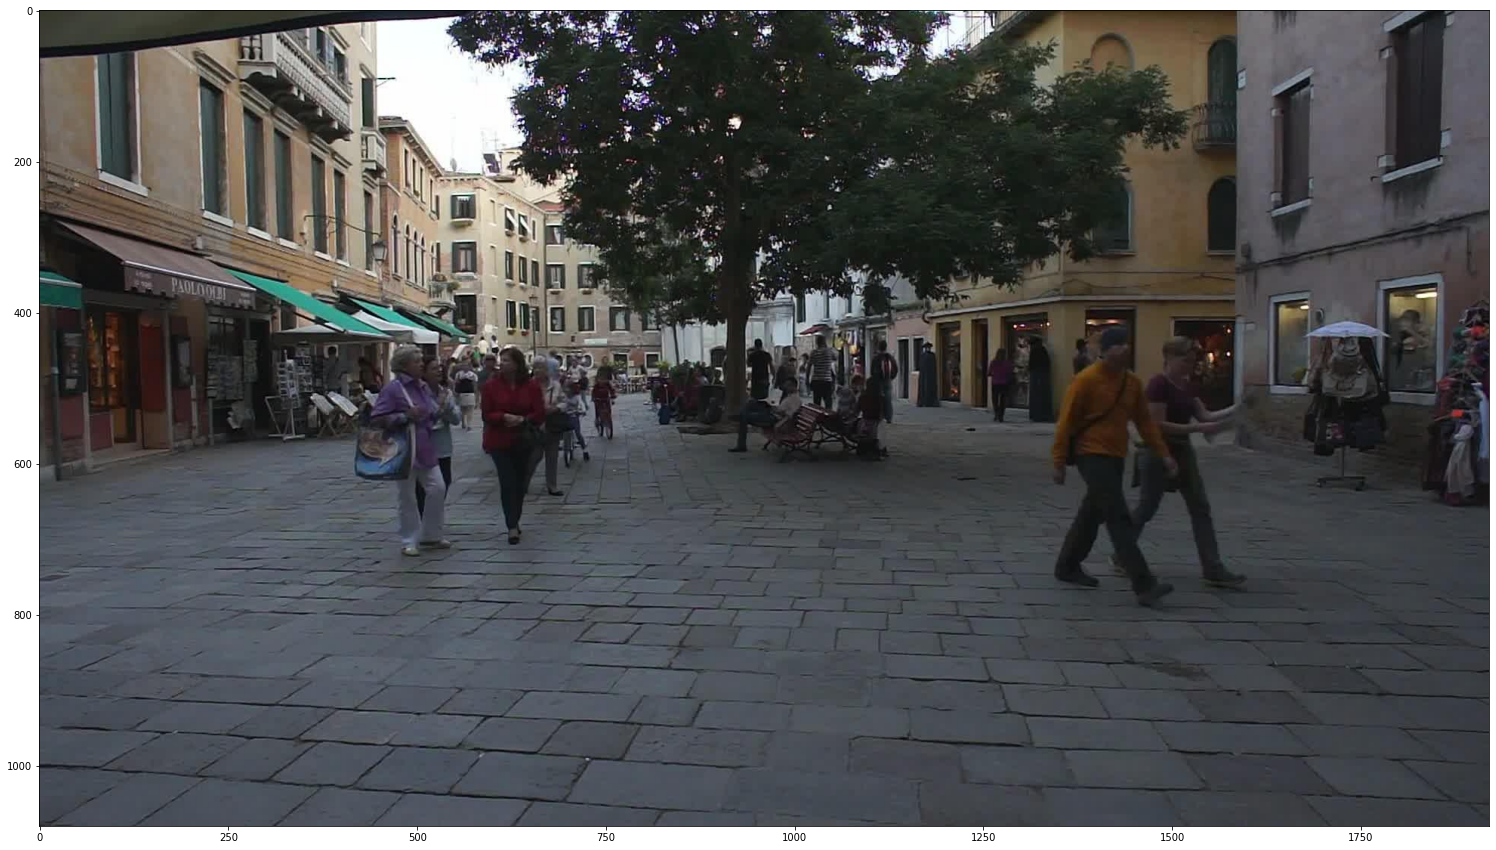

In [ ]:
image_path   = "/content/drive/MyDrive/ColabNotebooks/cs230robot-tensorflow-REALONE/images/MOT17-02/img1/000001.jpg"
image = detect_image(yolo, image_path, "", input_size=YOLO_INPUT_SIZE, show=False, CLASSES=TRAIN_CLASSES, rectangle_colors=(255,0,0))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(30,15))
plt.imshow(image)

# **You just trained your first Yolo v3 custom object detector on google colab, GOOD JOB!!**